### Case study #2 - Customer Revenue Analysis

In [56]:
import pandas as pd;
import numpy as np;
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


# special matplotlib argument for improved plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 8

In [23]:
data = pd.read_csv(r'/Users/praveen/Downloads/casestudy.csv')

#### Identifying Na Values is important before we proceed for analysis and we found the data had no null values.

In [5]:
data.isna().any()

Unnamed: 0        False
customer_email    False
net_revenue       False
year              False
dtype: bool

In [6]:
data.rename(columns={'Unnamed: 0':'id'},inplace=True)

In [7]:
data.head()

,id,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


### For each year we need the following information:
•	Total revenue for the current year

•	New Customer Revenue e.g. new customers not present in previous year only

•	Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

•	Revenue lost from attrition

•	Existing Customer Revenue Current Year

•	Existing Customer Revenue Prior Year

•	Total Customers Current Year

•	Total Customers Previous Year

•	New Customers

•	Lost Customers

In [8]:
data.shape

(685927, 4)

#### The Dataset has 4 columns and 685927 records

In [9]:
data["year"].value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

In [25]:
dic = {"Year":[],"Total revenue":[],"New customer Revenue":[],"Existing customer growth":[],"Revenue lost from attrition":[],"Existing Customer Revenue Current Year":[],
      "Existing Customer Revenue Prior Year":[],"Total Customers Current Year":[],"Total Customers Previous Year":[],
      "New Customers":[],"Lost Customers":[]}

The following function "calc" applies the calculations on records grouped by year and returns a dictionary with calculated fields

In [26]:
def calc(group):
    year = group['year'].unique()[0]
    y1 = data[data['year']==year]
    y2 = data[data['year']==year-1]
    set_cust1 = set(y1['customer_email'])
    set_cust2 = set(y2['customer_email'])
    rev1 = list(y1['net_revenue'])
    #year
    dic['Year'].append(year)
    
    # Total revenue
    dic['Total revenue'].append(round(sum(rev1),2))
    
    # New customers Revenue
    new_cust=list(set_cust1 - set_cust1.intersection(set_cust2))
    new_rev=y1['net_revenue'][y1['customer_email'].isin(new_cust)].sum()
    dic['New customer Revenue'].append(round(new_rev,2))
    
    # Existing customers Revenue Current year
    exis_cust=list(set_cust1.intersection(set_cust2))
    exi_rev=y1['net_revenue'][y1['customer_email'].isin(exis_cust)].sum()
    dic['Existing Customer Revenue Current Year'].append(round(exi_rev,2))
    
    # Existing customers Revenue Prior Year
    exi_rev_pre=y2['net_revenue'][y2['customer_email'].isin(exis_cust)].sum()
    dic['Existing Customer Revenue Prior Year'].append(round(exi_rev_pre,2))
    
    #Existing customer growth
    dic['Existing customer growth'].append(round(exi_rev-exi_rev_pre,2))
    
    # Total Customers Current Year
    dic['Total Customers Current Year'].append(len(set_cust1))
    
    # Total Customers Previous Year
    dic['Total Customers Previous Year'].append(len(set_cust2))
    
    #New customers
    new_cust_count = len(set_cust1 - set_cust1.intersection(set_cust2))
    dic['New Customers'].append(new_cust_count)
    
    #Lost customers
    cust_cur = list(set_cust1)
    lost_cust = y2['customer_email'][~y2['customer_email'].isin(cust_cur)]
    dic['Lost Customers'].append(lost_cust.count())
    
    # Revenue lost from attrition
    lost_rev = y2['net_revenue'][y2['customer_email'].isin(lost_cust)].sum()
    dic['Revenue lost from attrition'].append(round(lost_rev,2))
    
    
data.groupby('year').apply(calc)
print(dic)
df=pd.DataFrame.from_dict(dic)

{'Year': [2015, 2016, 2017], 'Total revenue': [29036749.19, 25730943.59, 31417495.03], 'New customer Revenue': [29036749.19, 18245491.01, 28776235.04], 'Existing customer growth': [0.0, 20335.46, 20611.34], 'Revenue lost from attrition': [0.0, 21571632.07, 23110294.94], 'Existing Customer Revenue Current Year': [0.0, 7485452.58, 2641259.99], 'Existing Customer Revenue Prior Year': [0.0, 7465117.12, 2620648.65], 'Total Customers Current Year': [231294, 204646, 249987], 'Total Customers Previous Year': [0, 231294, 204646], 'New Customers': [231294, 145062, 229028], 'Lost Customers': [0, 171710, 183687]}


In [27]:
# Dataframe df stores all the information needed for each year
df

,Year,Total revenue,New customer Revenue,Existing customer growth,Revenue lost from attrition,Existing Customer Revenue Current Year,Existing Customer Revenue Prior Year,Total Customers Current Year,Total Customers Previous Year,New Customers,Lost Customers
0,2015,29036749.19,29036749.19,0.00,0.00,0.00,0.00,231294,0,231294,0
1,2016,25730943.59,18245491.01,20335.46,21571632.07,7485452.58,7465117.12,204646,231294,145062,171710
2,2017,31417495.03,28776235.04,20611.34,23110294.94,2641259.99,2620648.65,249987,204646,229028,183687


Since the dataset had records from 2015 to 2017, the exisiting customers details were not calculated for year 2015 and indicated as zeroes

### Data Visualizations

Text(0.5, 1.0, 'Total revenue by year')

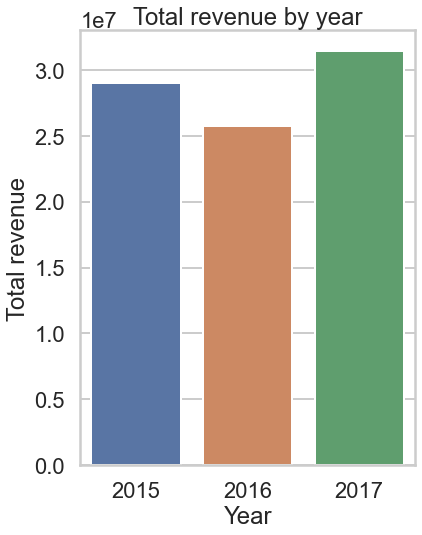

In [58]:
sns.barplot(x="Year",y="Total revenue",data=df)
plt.title("Total revenue by year")

#### The total revenue have dipped in the year 2016 and have improved significantly in 2017 as seen from above bar plot and that maybe due to the increase in total customers in 2017 which can be noted in the following plot.

Text(0.5, 1.0, 'Total Customers by year')

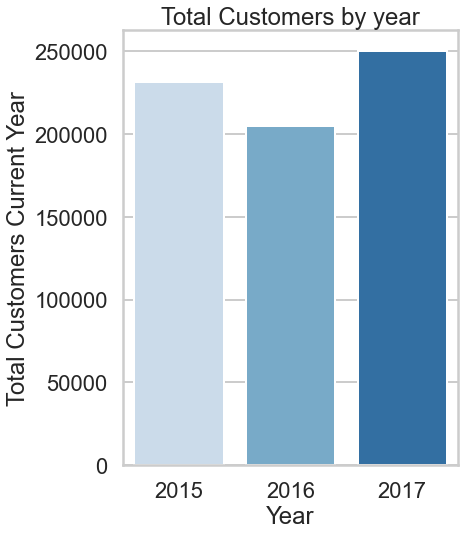

In [59]:
sns.barplot(x="Year",y="Total Customers Current Year",data=df,palette='Blues')
plt.title("Total Customers by year")

#### Average revenue generated per customer stays consistent in every year

In [44]:
df["Average revenue generated"]= df["Total revenue"]/df["Total Customers Current Year"]
df[["Year","Average revenue generated"]]

,Year,Average revenue generated
0,2015,125.540434
1,2016,125.733919
2,2017,125.676515


#### The stackplot below displays the total customers, new customers gained and lost customers for each year 

Text(0, 0.5, 'Customers count')

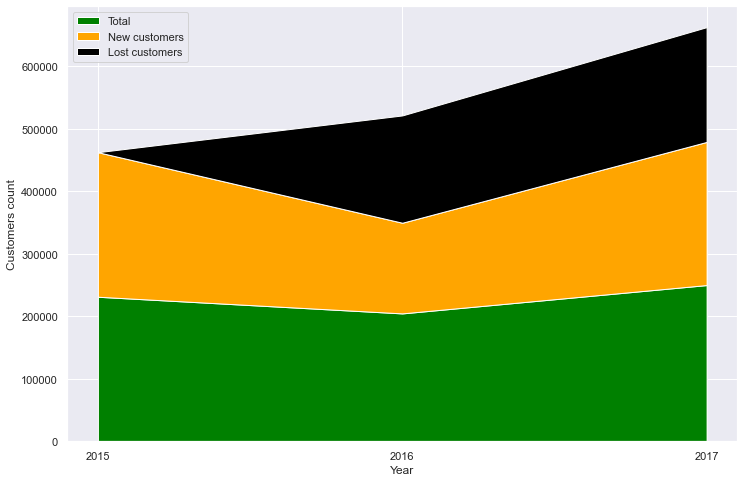

In [79]:
sns.set_theme()
rcParams['figure.figsize'] = 12, 8
ax=plt.stackplot(df['Year'], df['Total Customers Current Year'], df['New Customers'],df['Lost Customers'],
              labels=['Total', 'New customers','Lost customers'],
              colors=["green","orange","black"])
#ax.set_xticks(df.Year)
labels=['2015', '2016', '2017']
plt.xticks(df['Year'], labels)
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Customers count")

In [77]:
df

,Year,Total revenue,New customer Revenue,Existing customer growth,Revenue lost from attrition,Existing Customer Revenue Current Year,Existing Customer Revenue Prior Year,Total Customers Current Year,Total Customers Previous Year,New Customers,Lost Customers,Average revenue generated
0,2015,29036749.19,29036749.19,0.00,0.00,0.00,0.00,231294,0,231294,0,125.540434
1,2016,25730943.59,18245491.01,20335.46,21571632.07,7485452.58,7465117.12,204646,231294,145062,171710,125.733919
2,2017,31417495.03,28776235.04,20611.34,23110294.94,2641259.99,2620648.65,249987,204646,229028,183687,125.676515
